In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import os
import zipfile
import random
import shutil
from shutil import copyfile
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import torch
import torchvision
import cv2

%matplotlib inline
np.random.seed(1)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
import tensorflow as tf
import os

In [ ]:
interpreter = tf.lite.Interpreter(model_path = '/content/drive/MyDrive/tflite_model.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 20]
Output Type: <class 'numpy.float32'>


Saving rottenTomato (98).jpg to rottenTomato (98).jpg
Saving rottenTomato (97).jpg to rottenTomato (97).jpg
Saving rottenTomato (9).jpg to rottenTomato (9).jpg
Saving rottenTomato (87).jpg to rottenTomato (87).jpg
Saving rottenTomato (92).jpg to rottenTomato (92).jpg
Saving rottenTomato (93).jpg to rottenTomato (93).jpg
Saving rottenTomato (82).jpg to rottenTomato (82).jpg
Saving rottenTomato (8).jpg to rottenTomato (8).jpg
Saving rottenTomato (57).jpg to rottenTomato (57).jpg
Saving rottenTomato (56).jpg to rottenTomato (56).jpg
Saving rottenTomato (542).jpg to rottenTomato (542).jpg
Saving rottenTomato (532).jpg to rottenTomato (532).jpg


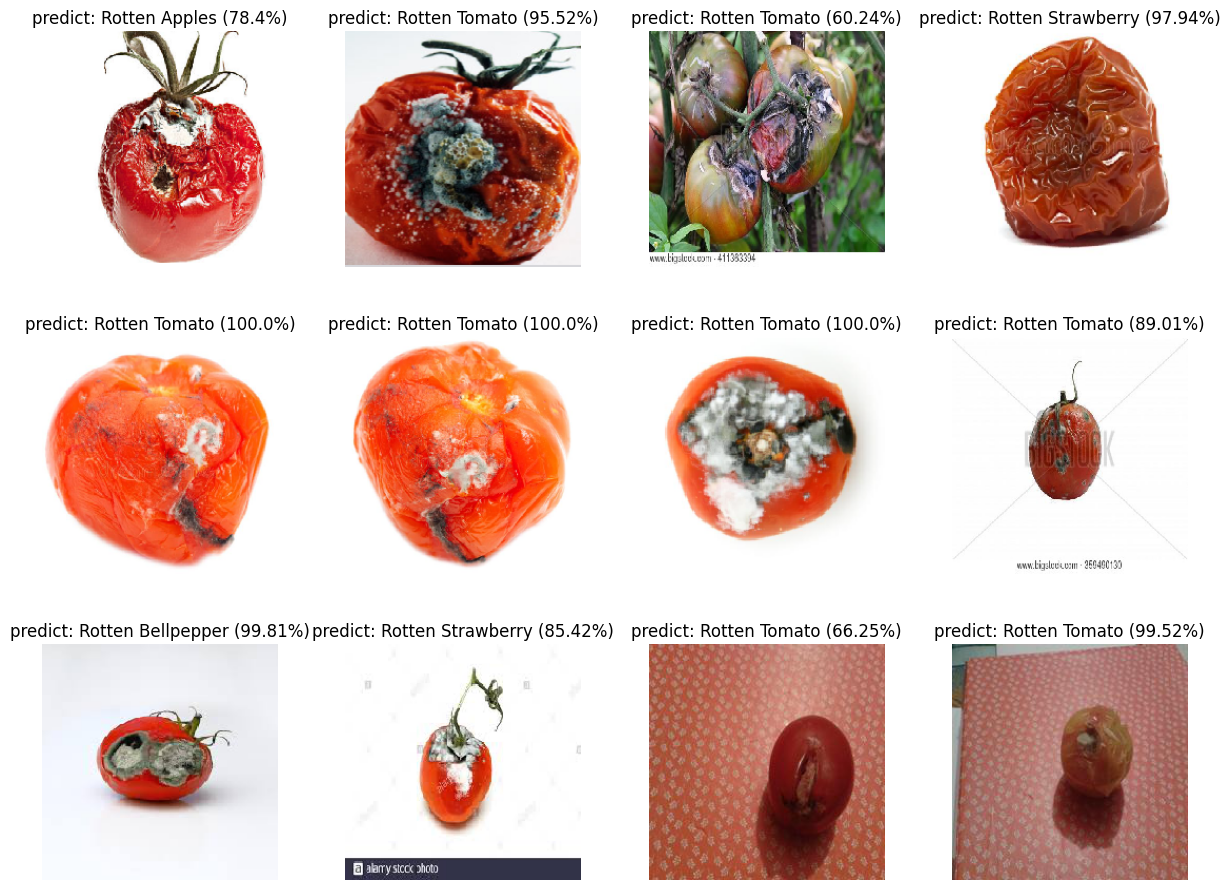

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/tflite_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  interpreter.set_tensor(input_details[0]['index'], images)
  interpreter.invoke()
  classes = interpreter.get_tensor(output_details[0]['index'])

  max = np.amax(classes[0])
  max = np.amax(classes[0])
  if np.where(classes[0] == max)[0] == 0:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Apples')
  elif np.where(classes[0] == max)[0] == 1:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Bananas')
  elif np.where(classes[0] == max)[0] == 2:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Bellpepper')
  elif np.where(classes[0] == max)[0] == 3:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Cucumber')
  elif np.where(classes[0] == max)[0] == 4:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Mango')
  elif np.where(classes[0] == max)[0] == 5:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Meat')
  elif np.where(classes[0] == max)[0] == 6:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Orange')
  elif np.where(classes[0] == max)[0] == 7:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Potato')
  elif np.where(classes[0] == max)[0] == 8:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Strawberry')
  elif np.where(classes[0] == max)[0] == 9:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Fresh Tomato')
  elif np.where(classes[0] == max)[0] == 10:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Apples')
  elif np.where(classes[0] == max)[0] == 11:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Bananas')
  elif np.where(classes[0] == max)[0] == 12:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Bellpepper')
  elif np.where(classes[0] == max)[0] == 13:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Cucumber')
  elif np.where(classes[0] == max)[0] == 14:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Mango')
  elif np.where(classes[0] == max)[0] == 15:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Meat')
  elif np.where(classes[0] == max)[0] == 16:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Orange')
  elif np.where(classes[0] == max)[0] == 17:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Potato')
  elif np.where(classes[0] == max)[0] == 18:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Strawberry')
  else:
    image_name.append(fn)
    image_conf.append(max)
    predict_result.append('Rotten Tomato')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name)//4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  plt.title(title, color='black')
  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')


In [ ]:
! pip install h5py pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h5py

model = '/content/drive/MyDrive/model.h5'

with h5py.File('/content/drive/MyDrive/model.h5', 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])


Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the model using the path
model = keras.models.load_model('/content/drive/MyDrive/model.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model3.tflite', 'wb') as f:
    f.write(tflite_model)